## 1. Setup do projeto

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

## 2. Carga dos dados

In [80]:
import pandas as pd 
header_list = ['age', 'sex', 'chest_pain_type', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data_rotulado = pd.read_csv('processed.cleveland.data', names=header_list)

In [81]:
data_rotulado.head()

,age,sex,chest_pain_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 3. Análise Exploratória

In [82]:
print('Dimensões do dataset: ', data_rotulado.shape)
data_rotulado.describe()

Dimensões do dataset:  (303, 14)


,age,sex,chest_pain_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [83]:
data_rotulado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   sex              303 non-null    float64
 2   chest_pain_type  303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               303 non-null    object 
 12  thal             303 non-null    object 
 13  num              303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


## 4. Preparação dos dados

In [84]:
# Sempre tem que remover o rotulo antes de aplicar o KMeans
data_nao_rotulado = data_rotulado.iloc[:, :-1]
data_nao_rotulado.head()

,age,sex,chest_pain_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [85]:
import pandas as pd
data_nao_rotulado = pd.get_dummies(data_nao_rotulado)
data_nao_rotulado

,age,sex,chest_pain_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,1,0,0,0,0,0,1,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,0,0,0,1,0,1,0,0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,0,0,1,0,0,0,0,1,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,1,0,0,0,0,1,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,1,0,0,0,0,0,0,1,0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,0,0,1,0,0,0,0,1,0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,0,1,0,0,0,0,0,1,0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,0,1,0,0,0,1,0,0,0


## 4. Agrupamento

In [86]:
model = KMeans(n_clusters=3)
model.fit(data_nao_rotulado)
grupos = model.predict(data_nao_rotulado)

In [87]:
print(grupos)

[2 0 2 2 1 2 2 0 2 1 1 0 2 2 1 1 2 2 2 2 1 2 2 1 1 1 0 2 2 1 2 2 0 2 2 2 1
 2 0 2 2 1 0 1 0 2 1 2 0 1 1 1 0 1 2 2 2 1 2 1 0 1 1 0 1 2 1 2 0 2 2 2 2 2
 1 0 2 0 2 2 1 2 0 2 0 2 2 1 2 2 0 1 2 1 2 2 2 2 1 1 2 1 0 2 1 0 1 2 2 1 0
 2 1 0 2 1 1 1 0 2 2 0 1 1 2 2 0 2 1 1 2 1 1 2 1 2 1 2 1 2 1 0 1 0 2 2 0 2
 0 0 0 2 0 0 2 0 0 0 0 2 1 0 1 2 2 1 1 0 2 1 2 2 2 0 1 2 2 1 0 2 2 0 2 2 0
 1 2 2 0 2 1 0 2 0 1 0 2 2 2 2 2 0 1 0 1 0 2 1 2 2 1 2 1 2 2 1 1 2 0 2 2 2
 1 2 2 1 1 2 1 1 1 0 1 2 1 2 2 2 2 0 2 0 2 2 1 2 2 2 1 1 1 1 2 0 0 1 1 1 2
 2 2 0 2 1 1 0 1 1 1 1 1 2 0 1 1 2 2 1 2 1 0 2 1 1 1 0 2 1 1 2 1 0 1 1 1 1
 1 2 2 1 1 2 1]


## 5. Visualização

In [88]:
xs = data_rotulado.iloc[:, 0]
ys = data_rotulado.iloc[:, 2]

centroids = model.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 2]

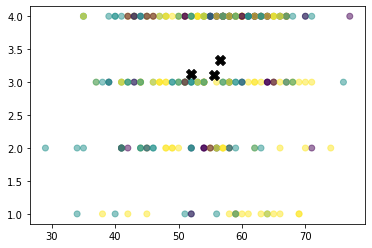

In [89]:
_=plt.scatter(xs, ys, c=grupos, alpha=.5)
_=plt.scatter(centroids_x, centroids_y, c='black', marker='X', s=100)

## 6. Avaliação

In [90]:
df = pd.DataFrame({'grupos': grupos, 'num': data_rotulado['num']})
ct = pd.crosstab(df['grupos'], df['num'])
print(ct)

num      0   1   2   3  4
grupos                   
0       28  10  12   7  5
1       68  14   9  13  4
2       68  31  15  15  4


In [91]:
ks = range(1, 10)
inercias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data_nao_rotulado)
    inercias.append(model.inertia_)

([<matplotlib.axis.XTick at 0x1ef00170a30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

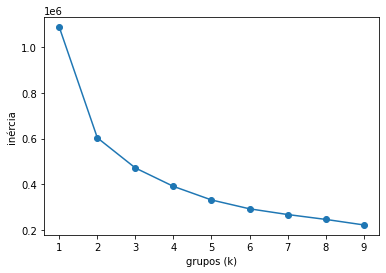

In [92]:
_=plt.plot(ks, inercias, '-o')
plt.xlabel('grupos (k)')
plt.ylabel('inércia')
plt.xticks(ks)

## Aumento no número de clusters, com base na analise dos dados de inercia

In [93]:
model = KMeans(n_clusters=8)
model.fit(data_nao_rotulado)
grupos = model.predict(data_nao_rotulado)

In [94]:
print(grupos)

[1 5 3 1 6 1 7 0 1 6 2 0 1 1 6 2 1 1 5 1 3 7 0 6 3 6 0 3 1 2 1 1 0 1 1 6 2
 5 0 7 3 6 0 6 0 1 2 7 4 6 6 2 0 6 1 5 1 2 1 3 0 2 3 0 3 7 2 1 0 1 7 1 5 1
 6 0 1 0 1 5 6 1 0 7 0 1 1 3 1 1 0 2 1 2 1 1 1 7 6 6 1 6 0 5 2 0 2 1 1 3 0
 1 6 0 5 3 6 6 0 5 1 4 3 3 0 1 7 3 6 6 1 1 6 1 6 1 2 5 3 1 6 7 6 0 1 1 7 1
 0 0 0 5 4 7 5 0 0 0 0 1 6 0 6 5 1 6 6 0 0 2 5 3 7 4 3 5 1 3 0 1 1 4 1 7 0
 6 1 7 7 7 6 5 1 5 3 5 7 1 1 7 1 0 2 0 6 0 5 3 1 7 6 6 6 7 1 6 6 1 5 1 1 1
 6 5 1 6 3 7 3 3 6 0 2 5 6 5 5 1 1 0 1 0 1 1 3 5 1 5 6 3 3 3 5 0 0 6 3 3 7
 1 1 0 1 6 2 0 6 3 6 2 3 7 0 2 6 7 7 6 1 3 0 1 3 6 6 0 7 3 6 1 3 0 2 2 3 2
 3 3 5 3 2 1 2]


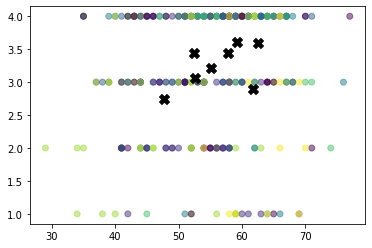

In [95]:
xs = data_rotulado.iloc[:, 0]
ys = data_rotulado.iloc[:, 2]

centroids = model.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 2]

_=plt.scatter(xs, ys, c=grupos, alpha=.5)
_=plt.scatter(centroids_x, centroids_y, c='black', marker='X', s=100)

In [96]:
df = pd.DataFrame({'grupos': grupos, 'num': data_rotulado['num']})
ct = pd.crosstab(df['grupos'], df['num'])
print(ct)

num      0   1  2  3  4
grupos                 
0       24  11  9  4  2
1       50  17  7  3  1
2       12   3  3  5  2
3       16   9  4  7  3
4        3   0  1  0  1
5        7   6  6  9  0
6       42   4  2  2  1
7       10   5  4  5  3


## Algoritmo DBSCAN

In [97]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics

X = pd.get_dummies(data_nao_rotulado)
db = DBSCAN(eps=9.7, min_samples=2, algorithm='ball_tree', metric='minkowski', leaf_size=90, p=2).fit(X)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 28
Estimated no. of noise points: 218


## Conclusão 

O Algoritmo KMeans com o uso de 8 clusters, apresentou um resultado melhor, com base nos dados apresentado na tabela crosstab.